In [1]:
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

In [3]:
from sklearn import linear_model

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
import numpy as np

In [6]:
googleplaystore = pd.read_csv('googleplaystore.csv')

In [7]:
googleplaystore = googleplaystore[googleplaystore.Rating <= 5.0]
googleplaystore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [8]:
googleplaystore.describe()

,Rating
count,9366.000000
mean,4.191757
std,0.515219
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [9]:
short = googleplaystore[['Rating','Reviews', 'Installs']]
short.head(100)

,Rating,Reviews,Installs
0,4.1,159,"10,000+"
1,3.9,967,"500,000+"
2,4.7,87510,"5,000,000+"
3,4.5,215644,"50,000,000+"
4,4.3,967,"100,000+"
...,...,...,...
96,4.4,2680,"500,000+"
97,4.0,1288,"100,000+"
98,4.7,18900,"500,000+"
99,4.9,49790,"1,000,000+"


In [10]:
googleplaystore.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [11]:
googleplaystore['Reviews'] = googleplaystore['Reviews'].str.replace('3.0M','0', regex = True).astype('int')
googleplaystore.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

array([[<AxesSubplot:title={'center':'Reviews'}>,
        <AxesSubplot:title={'center':'Rating'}>]], dtype=object)

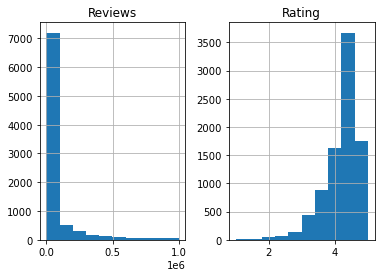

In [12]:
visual = googleplaystore[['Reviews', 'Rating']]
visual = visual[visual.Reviews <= 1000000]
visual.hist()

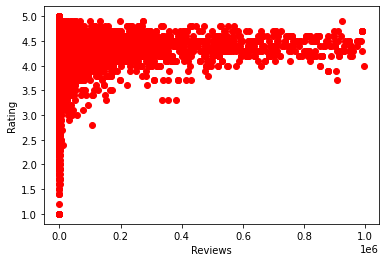

In [13]:
data = np.random.rand(len(visual)) < 0.8
train = visual[data]
test = visual[~data]
plt.xlabel("Reviews")
plt.ylabel("Rating")
plt.scatter(visual['Reviews'], visual['Rating'], color = 'red')

In [14]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Reviews']])
train_y = np.asanyarray(train[['Rating']])
regr.fit(train_x, train_y)

print('coefficient: ', regr.coef_)
print('intercept: ', regr.intercept_)

coefficient:  [[4.92679182e-07]]
intercept:  [4.14091973]


In [16]:
accuracy_score = regr.score(train_x, train_y)
print(accuracy_score)

0.02067504467172654


Text(0, 0.5, 'Rating')

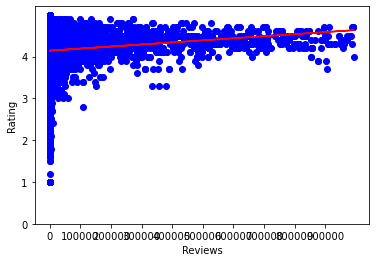

In [15]:
plt.scatter(train.Reviews, train.Rating, color = 'blue')
plt.rcParams["figure.figsize"] = (8,5.5)
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r' )
plt.xticks(np.arange(0, 1000000, 100000))
plt.yticks(np.arange(0, 5, 1))
plt.xlabel("Reviews")
plt.ylabel("Rating")